In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import pylab as pl
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  precision_score, recall_score,f1_score, brier_score_loss,roc_curve, auc, accuracy_score

## Data Pre-Processing

Loading the dataset and add a binary "Ylog" column, the column Y cointains the number of ECB hearings made in the each square inside the grid, the column "Ylog" contains the number 1 when the square has a positive value or "0" if the square does not contains any ECB hearing. 

In [2]:
# load dataset
dta = pd.read_csv('fish_ECB_311_lights_2014log.csv')

dta.head()

,FID,ECB,Y,Ylog,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,316,0,19,1,8,16,0,0,9,5,1,0,0,8,17,89,41,0,0
1,681,1,10,1,15,24,1,0,11,3,1,0,0,5,3,6,2,5,0
2,437,0,6,1,102,81,0,10,76,8,8,2,2,79,80,23,17,1,35
3,567,0,5,1,26,56,0,0,23,2,0,2,5,18,15,6,9,0,6
4,109,1,4,1,16,24,0,0,6,1,3,3,0,20,15,3,2,0,3


##Metadata
ECB_2014_16	Y

311	X1

Complaints about lights	X2

violation_parks	X3

vacant_lots	X4

sanitation_conditions	X5

other_enforcement	X6

maintainence_facility	X7

industrial_waste	X8

haz_materials	X9

general_constr	X10

dirty_conditions	X11

derelict_vehicles	X12

derelict_vehicle	X13

construction	X14

Air_quality	X15

The difference between derelict vehicle and derelict vehicles is,
Derelict vehicle are vehicles with license plates and Derelict vehicles are vehicles without license plates. 



In [4]:
# add "Ylog_1" column: 1 represents having ECB hearings, 0 represents not
dta['Ylog_1'] = (dta.Y > 0).astype(int)

In [5]:
dta.head()

,FID,ECB,Y,Ylog,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Ylog_1
0,316,0,19,1,8,16,0,0,9,5,1,0,0,8,17,89,41,0,0,1
1,681,1,10,1,15,24,1,0,11,3,1,0,0,5,3,6,2,5,0,1
2,437,0,6,1,102,81,0,10,76,8,8,2,2,79,80,23,17,1,35,1
3,567,0,5,1,26,56,0,0,23,2,0,2,5,18,15,6,9,0,6,1
4,109,1,4,1,16,24,0,0,6,1,3,3,0,20,15,3,2,0,3,1


## Data Exploration

In [7]:
means = dta.groupby('Ylog_1').mean()
means


,FID,ECB,Y,Ylog,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
Ylog_1,,,,,,,,,,,,,,,,,,,
0,458.273270,0.007160,0.000000,0,14.588305,22.375895,0.295943,0.745823,13.281623,2.970167,1.621718,0.692124,1.384248,12.491647,16.306683,8.250597,10.446301,3.767303,4.200477
1,529.925532,0.414894,2.095745,1,24.074468,28.840426,0.202128,1.595745,20.744681,4.446809,2.223404,1.063830,1.861702,19.351064,24.819149,15.159574,10.702128,1.914894,6.787234


In [8]:
means.to_csv('means.csv')

The Squares that have ECB hearings shows a considerable increase (114%) in the number of vacant lots-> X4 
the 3 following variables that show an increase are:

Derelict vehicles which are vehicles without license plates.

311 Complaints related with illegal Dumping 

Air quality conditions

## Data Visualization

In [11]:
%matplotlib inline

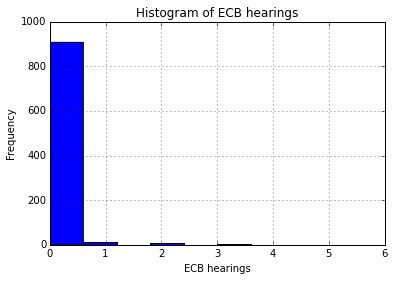

In [12]:
# histogram of ECB hearings
dta.ECB.hist()
plt.title('Histogram of ECB hearings')
plt.xlabel('ECB hearings')
plt.ylabel('Frequency')

The total of ECB hearings were ploted over a grid.


The grid was made with a selection of  400 by 400 foot resolution .

The total number of squares inside the fishnet are 931.

94 of the 931 squares are locations of an ECB hearing.




## Prepare Data for Logistic Regression


In [26]:
# flatten y into a 1-D array

y1 = dta[['Ylog']]

In [27]:
y = np.ravel(y1)


In [28]:
X = dta[[ 'X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11', 'X12','X13','X14','X15']]

## Logistic Regression

Run logistic regression on the entire data set

In [29]:
#Logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.89914163090128751

In [30]:
# Percentage had ECB herings
y.mean()

0.10085836909871244

Only 10% of the squares had an ECB hearing, which means that we could obtain 90% accuracy by always predicting "no". 



In [31]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,X1,[-0.00996030192993]
1,X2,[0.0054391244051]
2,X3,[-0.286216087468]
3,X4,[0.155071841079]
4,X5,[0.0212583251761]
5,X6,[0.0429675607646]
6,X7,[0.036712246675]
7,X8,[0.121410870766]
8,X9,[-0.00285330890666]
9,X10,[-0.00613672110926]


Increases in in the number of vacant lots-> X4  and industrial_waste--> X8 correspond to an increase in the likelihood of having an aECB hearing. 

## Model Evaluation Using a Validation Set
We have trained and tested on the same set. 
Now we are going to instead split the data into a training set and a testing set.

In [32]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we need to predict class labels for the test set. 
We will also generate the class probabilities.

In [33]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
# generate class probabilities
probs = model2.predict_proba(X_test)
#print probs[:,10]
probs.shape


(280, 2)

In [46]:
probs[:10]

array([[ 0.89846887,  0.10153113],
       [ 0.93704893,  0.06295107],
       [ 0.98191852,  0.01808148],
       [ 0.92814635,  0.07185365],
       [ 0.94522026,  0.05477974],
       [ 0.92814635,  0.07185365],
       [ 0.92173011,  0.07826989],
       [ 0.92265979,  0.07734021],
       [ 0.95954754,  0.04045246],
       [ 0.53479068,  0.46520932]])

In [52]:
pred = model2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred)    
### Indicadores 
roc_auc = auc(fpr, tpr)
acc =  accuracy_score(dta.Ylog, model2.predict(X))
print acc
print("Area under the ROC curve : %f" % roc_auc)


0.894849785408
Area under the ROC curve : 0.623437


[]

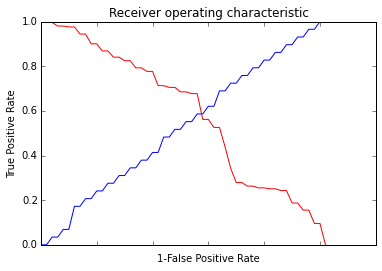

In [56]:

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])



The model is taking as a positive ECB hering predicted case all the probabilities above 9%

In [57]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.885714285714
0.623437285341


The accuracy is 88%, which is the same as we experienced when training and predicting on the same data.



In the next cells we can observe the confusion matrix and a classification report with other metrics.

In [59]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[247   4]
 [ 28   1]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       251
          1       0.20      0.03      0.06        29

avg / total       0.83      0.89      0.85       280



## Model Evaluation Using Cross-Validation

We are going to try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [60]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.89361702  0.89361702  0.89361702  0.84042553  0.86021505  0.87096774
  0.90322581  0.90322581  0.90217391  0.90217391]
0.886325883043


It's still performing at 88% accuracy.

## Predicting the Probability of an square that contains a possible ECB hearing

Now we are going to predict the probability of an ECB hearing for a random square not present in the dataset. 



In [62]:
model.predict_proba(np.array([16,23,0,1,14,3,2,1,1,13,17,9,10,4,4]))

/Users/tania/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.90501453,  0.09498547]])

The predicted probability of an an ECB hearing with this characteristics is 9%.

## Using K Neighbors Clasiffier



In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)
                    

0.889285714286


We can observe that KNeighborsClassifier give the same accuracy as logistic regression